In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ทดลองอ่านค่าและลอง plot ข้อมูลจาก Weather File

        Index:
            fieldNumber: a value between 0 to 34 for different available epw fields.
            0 Year
            1 Month
            2 Day
            3 Hour
            4 Minute
            -
            6 Dry Bulb Temperature
            7 Dew Point Temperature
            8 Relative Humidity
            9 Atmospheric Station Pressure
            10 Extraterrestrial Horizontal Radiation
            11 Extraterrestrial Direct Normal Radiation
            12 Horizontal Infrared Radiation Intensity
            13 Global Horizontal Radiation
            14 Direct Normal Radiation
            15 Diffuse Horizontal Radiation
            16 Global Horizontal Illuminance
            17 Direct Normal Illuminance
            18 Diffuse Horizontal Illuminance
            19 Zenith Luminance
            20 Wind Direction
            21 Wind Speed
            22 Total Sky Cover
            23 Opaque Sky Cover
            24 Visibility
            25 Ceiling Height
            26 Present Weather Observation
            27 Present Weather Codes
            28 Precipitable Water
            29 Aerosol Optical Depth
            30 Snow Depth
            31 Days Since Last Snowfall
            32 Albedo
            33 Liquid Precipitation Depth
            34 Liquid Precipitation Quantity

## Exercise

* สร้างกราฟเส้นแสดงอุณหภูมิภายนอกของเดือน May
* หาความเร็วลมเฉลี่ยของทั้งปี
* สร้าง DataFrame ที่แสดงข้อมูล [Dry Blub Temp., Relative Humidity, Wind Speed, Direct Normal Radiation]
* หาว่ามีช่วงเวลาที่อุณหภูมิสูงกว่า 30 องศาทั้งหมดกี่ชั่วโมง และต่ำกว่า 25 กี่ชั่วโมง ในหนึ่งปี
* หาว่ามีช่วงเวลาที่อุณหภูมิสูงกว่า 30 และความเร็วลมสูงกว่า 3 m/s อยู่กี่ชั่วโมง
* สร้างกราฟเส้นแสดง Direct Normal Illuminance และ Diffuse Horizontal Illuminance ของวันที่ Global Horizontal Radiation สูงที่สุด

## Hint 1

In [4]:
day = 21
month = 6
hour = 24*2

outtemp = []
rhumidity = []
infraredhorizontal = []
directnormal = []
diffusehorizontal = []

def get_data_from_weather_file(day=1,month=1,hour=24):
    m = [31,28,31,30,31,30,31,31,30,31,30,31]
    h = (((day-1)*24)+(sum(m[:month-1])*24))

    bkk = "./data/THA_Bangkok.484560_IWEC.epw"
    with open(bkk, 'r') as EPWRead:
        lines = EPWRead.readlines()
        for text in lines[h+8:h+hour+8]:
            datalist = text.split(",")
            outtemp.append(float(datalist[6])) # 6 Dry Bulb Temperature
            #rhumidity.append(float(datalist[8])) # 8 Relative Humidity
            infraredhorizontal.append(float(datalist[12])) # 12 Horizontal Infrared Radiation Intensity
            directnormal.append(float(datalist[14])) # 14 Direct Normal Radiation
            diffusehorizontal.append(float(datalist[15])) # 15 Diffuse Horizontal Radiation
    #outtemp = yeartemp[h:h+hour]
get_data_from_weather_file(day,month,hour)

In [12]:
outtemp[:5]

[26.8, 26.6, 26.3, 26.1, 26.1]

## Hint 2

In [61]:
out_temp = []
wind_speed = []
bkk = "./data/THA_Bangkok.484560_IWEC.epw"
with open(bkk, 'r') as EPWRead:
    for i in EPWRead.readlines()[8:]:
        data = i.split(',')
        out_temp.append(float(data[6]))
        wind_speed.append(float(data[21]))

In [56]:
dti = pd.date_range('2018-01-1', periods=8760, freq='H')

In [68]:
df = pd.DataFrame({'Out Temp.': out_temp, 'Wind Speed': wind_speed}, index=dti)

In [69]:
df.head()

,Out Temp.,Wind Speed
2018-01-01 00:00:00,23.6,1.0
2018-01-01 01:00:00,22.4,0.7
2018-01-01 02:00:00,21.3,0.3
2018-01-01 03:00:00,20.4,0.0
2018-01-01 04:00:00,19.6,0.0


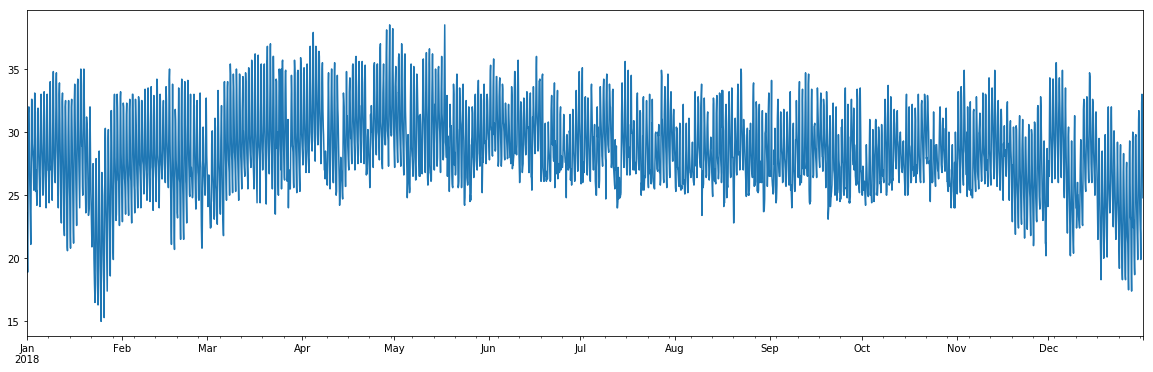

In [71]:
df['Out Temp.'].plot(figsize=(20,6))

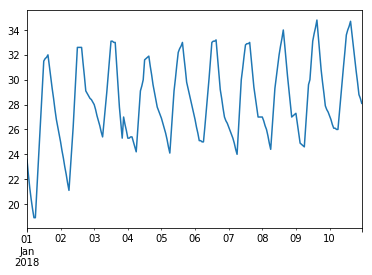

In [72]:
df['Out Temp.'][:24*10].plot()